## Introduction to Data Science

### Predictive Analysis - numerical data with regularization

#### Inspired by [this repo](https://github.com/Weesper1985/Predict_real_estate_prices), codes [here](https://www.kaggle.com/dhainjeamita/linear-regression/code), [here](https://www.kaggle.com/vikrishnan/house-sales-price-using-regression) and [here](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/). Used [this data](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). Tried using [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) techniques

In [0]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

from itertools import cycle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LogNorm
import seaborn as sns
#import pydotplus

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz

import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from IPython.display import Image  

%matplotlib inline

In [0]:
#Checking if we have a GPU
device_lib.list_local_devices()

Out[167]: [name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10154213860832146990
 xla_global_id: -1]

### Importing the datasets and exploring data

In [0]:
datapath = "./data/communities/"
outputs = "./data/communities/"

In [0]:
!ls ./data/communities/

communities.data  communities.names


In [0]:
! head -n10 ./data/communities/communities.names

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real


In [0]:
! head -n3 ./data/communities/communities.data

In [0]:
names = open(os.path.join(datapath, 'communities.names'), 'r').readlines()
attributes = [n for n in names if n.startswith('@attribute')]
attributes = [a.split()[1] for a in attributes]
print(len(attributes))
print(attributes)

128
['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [0]:
df = pd.read_csv(os.path.join(datapath, 'communities.data'), 
                 na_values='?', 
                 header=None, 
                 names=attributes)
df.head()

state 
 county 
 community 
 communityname 
 fold 
 population 
 householdsize 
 racepctblack 
 racePctWhite 
 racePctAsian 
 racePctHisp 
 agePct12t21 
 agePct12t29 
 agePct16t24 
 agePct65up 
 numbUrban 
 pctUrban 
 medIncome 
 pctWWage 
 pctWFarmSelf 
 pctWInvInc 
 pctWSocSec 
 pctWPubAsst 
 pctWRetire 
 medFamInc 
 perCapInc 
 whitePerCap 
 blackPerCap 
 indianPerCap 
 AsianPerCap 
 OtherPerCap 
 HispPerCap 
 NumUnderPov 
 PctPopUnderPov 
 PctLess9thGrade 
 PctNotHSGrad 
 PctBSorMore 
 PctUnemployed 
 PctEmploy 
 PctEmplManu 
 ... 
 RentMedian 
 RentHighQ 
 MedRent 
 MedRentPctHousInc 
 MedOwnCostPctInc 
 MedOwnCostPctIncNoMtg 
 NumInShelters 
 NumStreet 
 PctForeignBorn 
 PctBornSameState 
 PctSameHouse85 
 PctSameCity85 
 PctSameState85 
 LemasSwornFT 
 LemasSwFTPerPop 
 LemasSwFTFieldOps 
 LemasSwFTFieldPerPop 
 LemasTotalReq 
 LemasTotReqPerPop 
 PolicReqPerOffic 
 PolicPerPop 
 RacialMatchCommPol 
 PctPolicWhite 
 PctPolicBlack 
 PctPolicHisp 
 PctPolicAsian 
 PctPolicMinor 
 OfficAssgnDrugUnits 
 NumKindsDrugsSeiz 
 PolicAveOTWorked 
 LandArea 
 PopDens 
 PctUsePubTrans 
 PolicCars 
 PolicOperBudg 
 LemasPctPolicOnPatr 
 LemasGangUnitDeploy 
 LemasPctOfficDrugUn 
 PolicBudgPerPop 
 ViolentCrimesPerPop 
 
 
 
 
 0 
 8 
 NaN 
 NaN 
 Lakewoodcity 
 1 
 0.19 
 0.33 
 0.02 
 0.90 
 0.12 
 0.17 
 0.34 
 0.47 
 0.29 
 0.32 
 0.20 
 1.0 
 0.37 
 0.72 
 0.34 
 0.60 
 0.29 
 0.15 
 0.43 
 0.39 
 0.40 
 0.39 
 0.32 
 0.27 
 0.27 
 0.36 
 0.41 
 0.08 
 0.19 
 0.10 
 0.18 
 0.48 
 0.27 
 0.68 
 0.23 
 ... 
 0.35 
 0.38 
 0.34 
 0.38 
 0.46 
 0.25 
 0.04 
 0.0 
 0.12 
 0.42 
 0.50 
 0.51 
 0.64 
 0.03 
 0.13 
 0.96 
 0.17 
 0.06 
 0.18 
 0.44 
 0.13 
 0.94 
 0.93 
 0.03 
 0.07 
 0.1 
 0.07 
 0.02 
 0.57 
 0.29 
 0.12 
 0.26 
 0.20 
 0.06 
 0.04 
 0.9 
 0.5 
 0.32 
 0.14 
 0.20 
 
 
 1 
 53 
 NaN 
 NaN 
 Tukwilacity 
 1 
 0.00 
 0.16 
 0.12 
 0.74 
 0.45 
 0.07 
 0.26 
 0.59 
 0.35 
 0.27 
 0.02 
 1.0 
 0.31 
 0.72 
 0.11 
 0.45 
 0.25 
 0.29 
 0.39 
 0.29 
 0.37 
 0.38 
 0.33 
 0.16 
 0.30 
 0.22 
 0.35 
 0.01 
 0.24 
 0.14 
 0.24 
 0.30 
 0.27 
 0.73 
 0.57 
 ... 
 0.38 
 0.40 
 0.37 
 0.29 
 0.32 
 0.18 
 0.00 
 0.0 
 0.21 
 0.50 
 0.34 
 0.60 
 0.52 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.02 
 0.12 
 0.45 
 NaN 
 NaN 
 NaN 
 NaN 
 0.00 
 NaN 
 0.67 
 
 
 2 
 24 
 NaN 
 NaN 
 Aberdeentown 
 1 
 0.00 
 0.42 
 0.49 
 0.56 
 0.17 
 0.04 
 0.39 
 0.47 
 0.28 
 0.32 
 0.00 
 0.0 
 0.30 
 0.58 
 0.19 
 0.39 
 0.38 
 0.40 
 0.84 
 0.28 
 0.27 
 0.29 
 0.27 
 0.07 
 0.29 
 0.28 
 0.39 
 0.01 
 0.27 
 0.27 
 0.43 
 0.19 
 0.36 
 0.58 
 0.32 
 ... 
 0.29 
 0.27 
 0.31 
 0.48 
 0.39 
 0.28 
 0.00 
 0.0 
 0.14 
 0.49 
 0.54 
 0.67 
 0.56 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.01 
 0.21 
 0.02 
 NaN 
 NaN 
 NaN 
 NaN 
 0.00 
 NaN 
 0.43 
 
 
 3 
 34 
 5.0 
 81440.0 
 Willingborotownship 
 1 
 0.04 
 0.77 
 1.00 
 0.08 
 0.12 
 0.10 
 0.51 
 0.50 
 0.34 
 0.21 
 0.06 
 1.0 
 0.58 
 0.89 
 0.21 
 0.43 
 0.36 
 0.20 
 0.82 
 0.51 
 0.36 
 0.40 
 0.39 
 0.16 
 0.25 
 0.36 
 0.44 
 0.01 
 0.10 
 0.09 
 0.25 
 0.31 
 0.33 
 0.71 
 0.36 
 ... 
 0.70 
 0.77 
 0.89 
 0.63 
 0.51 
 0.47 
 0.00 
 0.0 
 0.19 
 0.30 
 0.73 
 0.64 
 0.65 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.02 
 0.39 
 0.28 
 NaN 
 NaN 
 NaN 
 NaN 
 0.00 
 NaN 
 0.12 
 
 
 4 
 42 
 95.0 
 6096.0 
 Bethlehemtownship 
 1 
 0.01 
 0.55 
 0.02 
 0.95 
 0.09 
 0.05 
 0.38 
 0.38 
 0.23 
 0.36 
 0.02 
 0.9 
 0.50 
 0.72 
 0.16 
 0.68 
 0.44 
 0.11 
 0.71 
 0.46 
 0.43 
 0.41 
 0.28 
 0.00 
 0.74 
 0.51 
 0.48 
 0.00 
 0.06 
 0.25 
 0.30 
 0.33 
 0.12 
 0.65 
 0.67 
 ... 
 0.36 
 0.38 
 0.38 
 0.22 
 0.51 
 0.21 
 0.00 
 0.0 
 0.11 
 0.72 
 0.64 
 0.61 
 0.53 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.04 
 0.09 
 0.02 
 NaN 
 NaN 
 NaN

In [0]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 128 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    state                  1994 non-null   int64  
 1    county                 820 non-null    float64
 2    community              817 non-null    float64
 3    communityname          1994 non-null   object 
 4    fold                   1994 non-null   int64  
 5    population             1994 non-null   float64
 6    householdsize          1994 non-null   float64
 7    racepctblack           1994 non-null   float64
 8    racePctWhite           1994 non-null   float64
 9    racePctAsian           1994 non-null   float64
 10   racePctHisp            1994 non-null   float64
 11   agePct12t21            1994 non-null   float64
 12   agePct12t29            1994 non-null   float64
 13   agePct16t24            1994 non-null   float64
 14   agePct65up             1994 non-null  

In [0]:
#non numeric
columns1 = ['state', 'county', 'community', 'communityname', 'fold']

#many missing values
columns2 = ['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
            'LemasTotalReq',  'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
            'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
            'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
            'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
            'LemasGangUnitDeploy', 'PolicBudgPerPop', 'OtherPerCap']

df.drop(columns=columns1, inplace=True)
df.drop(columns=columns2, inplace=True)

In [0]:
df.info(verbose=True, null_counts=True)

<command-2100321592107723>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome            

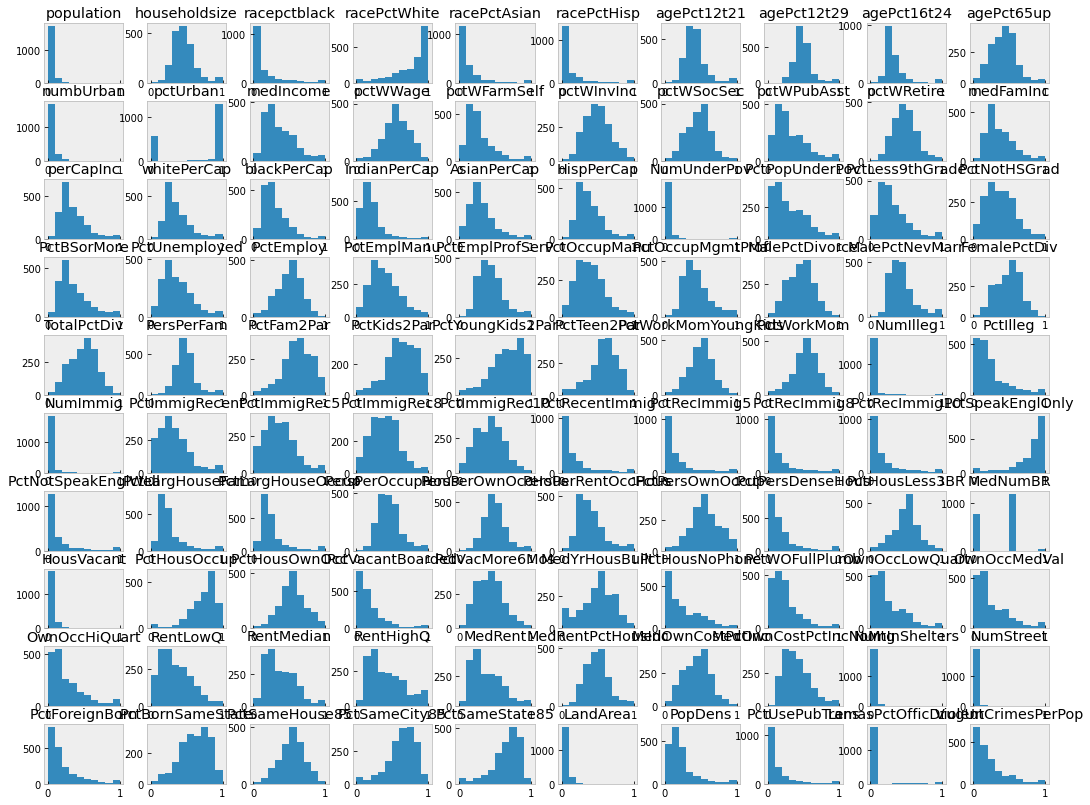

In [0]:
# histograms
df.hist(bins=10,figsize=(18,14),grid=False);

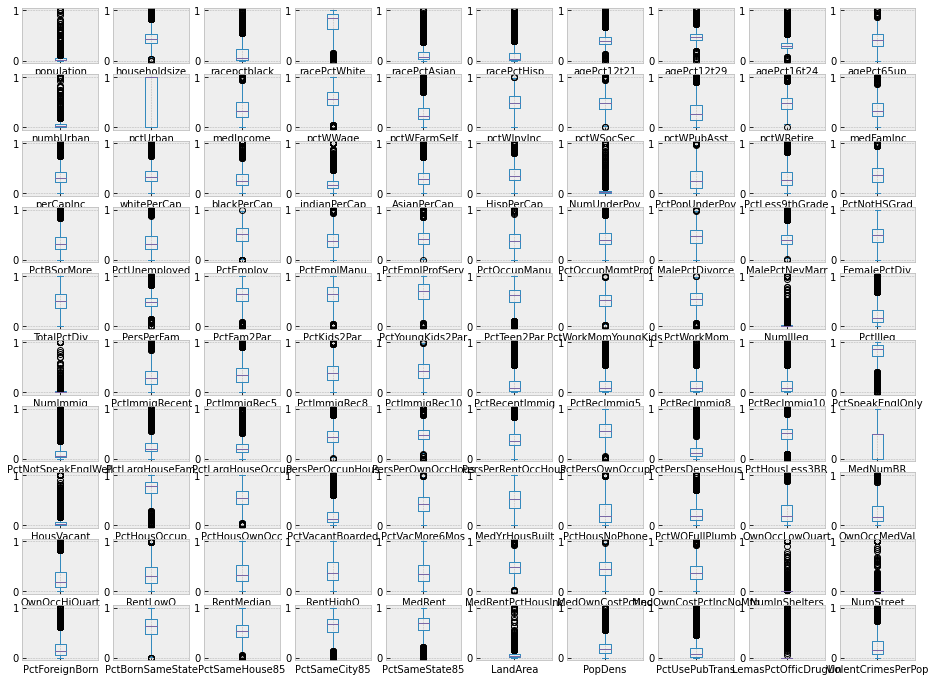

In [0]:
df.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(16,12))
plt.show()

In [0]:
# correlation
pd.set_option('precision', 2)
df.corr(method='pearson')

population 
 householdsize 
 racepctblack 
 racePctWhite 
 racePctAsian 
 racePctHisp 
 agePct12t21 
 agePct12t29 
 agePct16t24 
 agePct65up 
 numbUrban 
 pctUrban 
 medIncome 
 pctWWage 
 pctWFarmSelf 
 pctWInvInc 
 pctWSocSec 
 pctWPubAsst 
 pctWRetire 
 medFamInc 
 perCapInc 
 whitePerCap 
 blackPerCap 
 indianPerCap 
 AsianPerCap 
 HispPerCap 
 NumUnderPov 
 PctPopUnderPov 
 PctLess9thGrade 
 PctNotHSGrad 
 PctBSorMore 
 PctUnemployed 
 PctEmploy 
 PctEmplManu 
 PctEmplProfServ 
 PctOccupManu 
 PctOccupMgmtProf 
 MalePctDivorce 
 MalePctNevMarr 
 FemalePctDiv 
 ... 
 PctNotSpeakEnglWell 
 PctLargHouseFam 
 PctLargHouseOccup 
 PersPerOccupHous 
 PersPerOwnOccHous 
 PersPerRentOccHous 
 PctPersOwnOccup 
 PctPersDenseHous 
 PctHousLess3BR 
 MedNumBR 
 HousVacant 
 PctHousOccup 
 PctHousOwnOcc 
 PctVacantBoarded 
 PctVacMore6Mos 
 MedYrHousBuilt 
 PctHousNoPhone 
 PctWOFullPlumb 
 OwnOccLowQuart 
 OwnOccMedVal 
 OwnOccHiQuart 
 RentLowQ 
 RentMedian 
 RentHighQ 
 MedRent 
 MedRentPctHousInc 
 MedOwnCostPctInc 
 MedOwnCostPctIncNoMtg 
 NumInShelters 
 NumStreet 
 PctForeignBorn 
 PctBornSameState 
 PctSameHouse85 
 PctSameCity85 
 PctSameState85 
 LandArea 
 PopDens 
 PctUsePubTrans 
 LemasPctOfficDrugUn 
 ViolentCrimesPerPop 
 
 
 
 
 population 
 1.00 
 -4.61e-02 
 0.23 
 -0.30 
 1.82e-01 
 0.16 
 6.37e-03 
 0.13 
 0.08 
 -1.02e-01 
 0.99 
 2.39e-01 
 -0.10 
 4.51e-03 
 -0.13 
 -0.15 
 -0.12 
 0.18 
 -0.09 
 -0.11 
 -0.06 
 0.04 
 -0.06 
 -1.73e-02 
 -0.08 
 -0.08 
 0.95 
 0.16 
 0.04 
 0.06 
 -3.42e-03 
 0.15 
 -5.22e-03 
 -1.06e-01 
 2.18e-02 
 -2.94e-02 
 -2.14e-02 
 0.23 
 0.25 
 0.26 
 ... 
 0.18 
 0.19 
 1.24e-01 
 -3.66e-02 
 -3.48e-03 
 3.15e-02 
 -0.25 
 0.21 
 0.22 
 -0.21 
 0.90 
 -0.09 
 -0.25 
 0.33 
 -8.54e-02 
 -0.06 
 6.15e-02 
 0.11 
 -0.01 
 6.89e-04 
 1.86e-02 
 -6.48e-03 
 -9.84e-03 
 4.06e-03 
 -0.02 
 0.13 
 0.08 
 -0.04 
 0.82 
 0.65 
 0.17 
 -0.13 
 -0.12 
 1.61e-03 
 -8.96e-02 
 7.14e-01 
 2.32e-01 
 2.70e-01 
 0.47 
 0.37 
 
 
 householdsize 
 -0.05 
 1.00e+00 
 -0.07 
 -0.24 
 2.02e-01 
 0.47 
 5.20e-01 
 0.37 
 0.30 
 -6.13e-01 
 -0.05 
 -1.57e-02 
 0.21 
 4.40e-01 
 0.18 
 -0.16 
 -0.45 
 0.12 
 -0.32 
 0.11 
 -0.13 
 -0.13 
 0.04 
 -7.85e-03 
 -0.06 
 -0.09 
 -0.03 
 0.06 
 0.17 
 0.10 
 -3.34e-02 
 0.14 
 1.13e-01 
 2.33e-02 
 -8.40e-02 
 5.46e-02 
 -7.50e-02 
 -0.45 
 0.15 
 -0.35 
 ... 
 0.42 
 0.66 
 7.41e-01 
 8.93e-01 
 8.25e-01 
 7.25e-01 
 0.14 
 0.50 
 -0.33 
 0.22 
 -0.18 
 0.23 
 0.19 
 0.05 
 -3.70e-02 
 0.25 
 -7.92e-03 
 0.14 
 0.13 
 1.24e-01 
 1.00e-01 
 1.50e-01 
 1.68e-01 
 1.80e-01 
 0.18 
 0.13 
 0.25 
 -0.10 
 -0.08 
 -0.04 
 0.31 
 -0.05 
 -0.06 
 -1.03e-01 
 -3.28e-03 
 -1.51e-02 
 -4.07e-03 
 -5.15e-02 
 -0.09 
 -0.03 
 
 
 racepctblack 
 0.23 
 -6.71e-02 
 1.00 
 -0.79 
 -1.07e-01 
 -0.07 
 1.22e-01 
 0.15 
 0.13 
 5.29e-02 
 0.22 
 -1.27e-03 
 -0.36 
 -2.28e-01 
 -0.15 
 -0.49 
 0.11 
 0.44 
 -0.07 
 -0.36 
 -0.29 
 -0.10 
 -0.25 
 -4.85e-02 
 -0.12 
 -0.15 
 0.32 
 0.49 
 0.29 
 0.37 
 -1.80e-01 
 0.39 
 -2.73e-01 
 -1.76e-02 
 9.85e-02 
 2.35e-01 
 -1.96e-01 
 0.40 
 0.28 
 0.43 
 ... 
 -0.05 
 0.19 
 1.09e-01 
 -1.12e-01 
 -1.72e-01 
 1.08e-01 
 -0.38 
 0.16 
 0.23 
 -0.15 
 0.28 
 -0.25 
 -0.34 
 0.47 
 1.69e-01 
 -0.09 
 4.85e-01 
 0.30 
 -0.29 
 -2.70e-01 
 -2.46e-01 
 -3.21e-01 
 -3.05e-01 
 -2.93e-01 
 -0.28 
 0.19 
 -0.07 
 0.22 
 0.23 
 0.17 
 -0.10 
 0.09 
 -0.05 
 5.64e-02 
 -2.89e-03 
 1.50e-01 
 9.51e-02 
 1.47e-01 
 0.26 
 0.63 
 
 
 racePctWhite 
 -0.30 
 -2.36e-01 
 -0.79 
 1.00 
 -2.70e-01 
 -0.44 
 -1.94e-01 
 -0.27 
 -0.18 
 1.36e-01 
 -0.30 
 -5.23e-02 
 0.31 
 1.17e-01 
 0.10 
 0.60 
 0.07 
 -0.59 
 0.23 
 0.34 
 0.32 
 0.12 
 0.19 
 3.98e-02 
 0.15 
 0.21 
 -0.38 
 -0.54 
 -0.47 
 -0.49 
 2.18e-01 
 -0.52 
 2.55e-01 
 3.82e-02 
 2.75e-02 
 -2.63e-01 
 2.60e-01 
 -0.34 
 -0.38 
 -0.45 
 ... 
 -0.45 
 -0.59 
 -5.23e-01 
 -2.14e-01 
 -1.17e-01 
 -4.71e-01 
 0.51 
 -0.64 
 -0.37 
 0.28 
 -0.28 
 0.18 
 0.44 
 -0.45 
 7.26e-03 
 0.02 
 -4.81e-01 
 -0.42

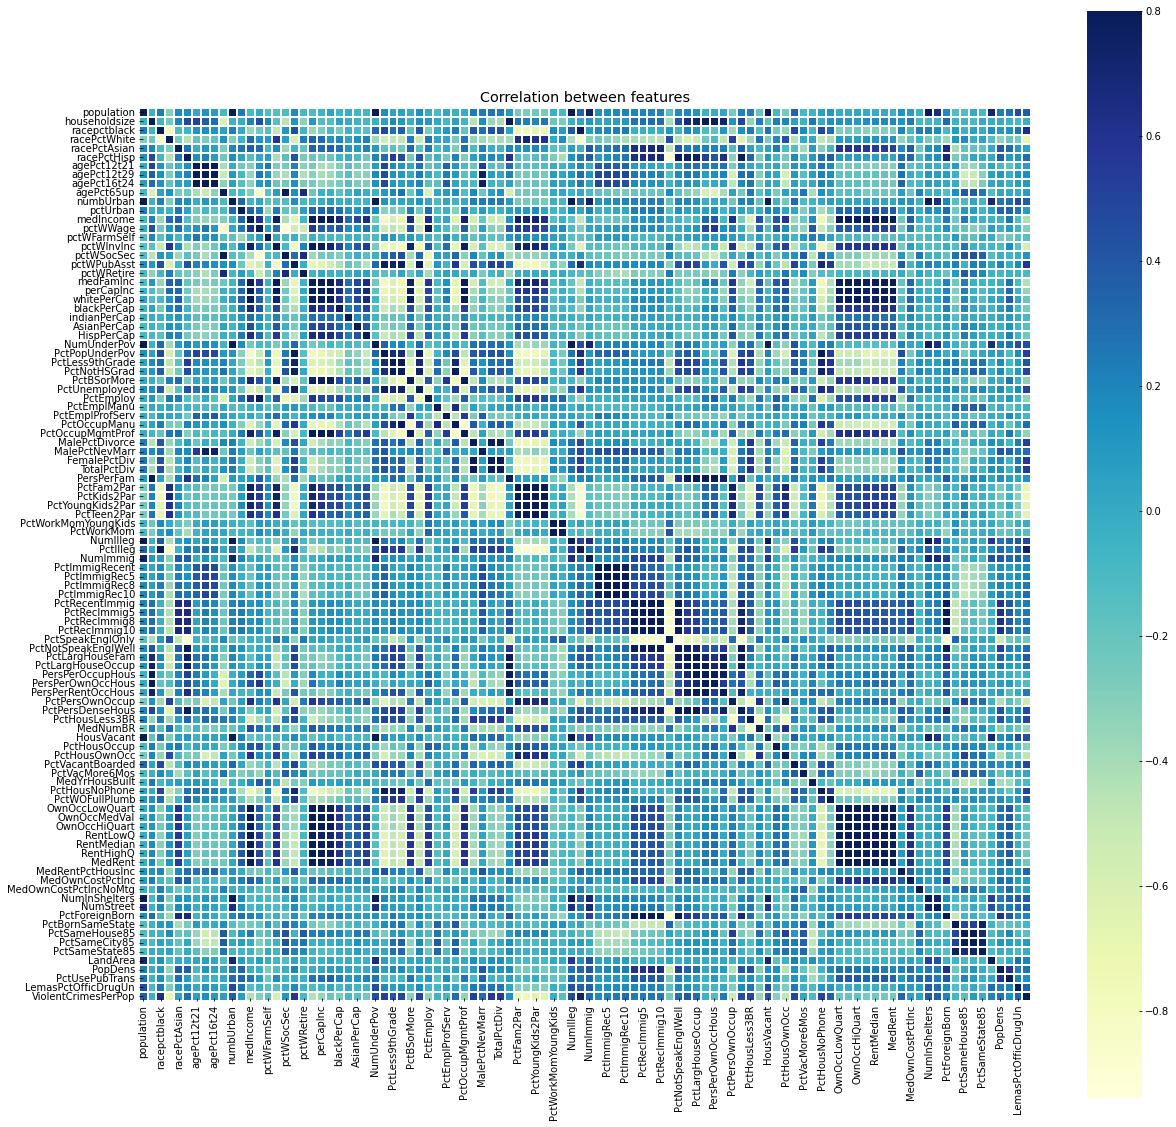

In [0]:
corr=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [0]:
crimes = df['ViolentCrimesPerPop']

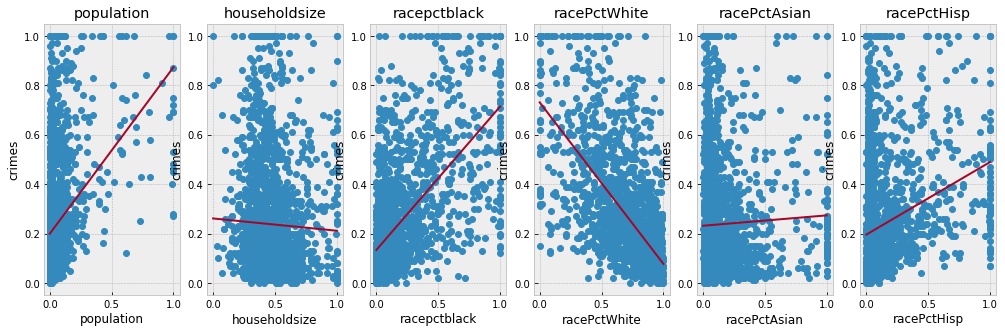

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[0:6]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

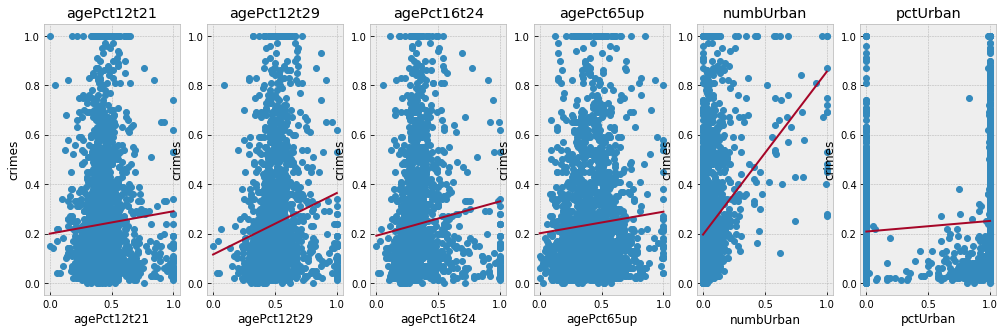

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[6:12]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

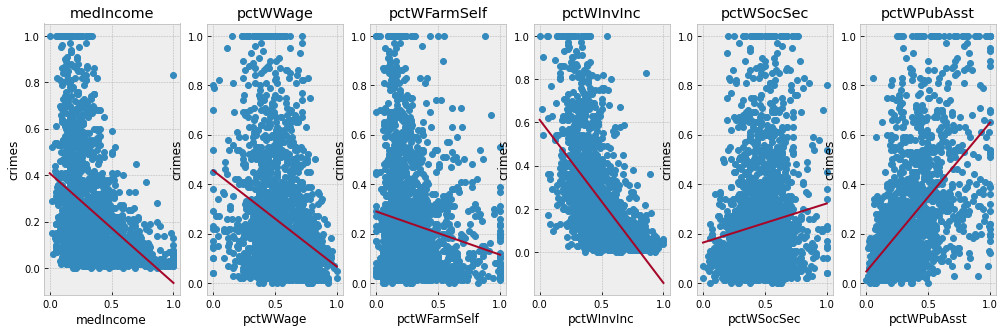

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[12:18]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

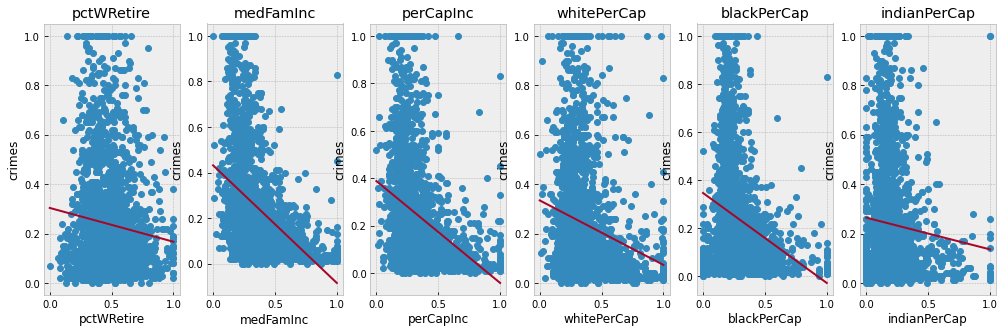

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[18:24]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

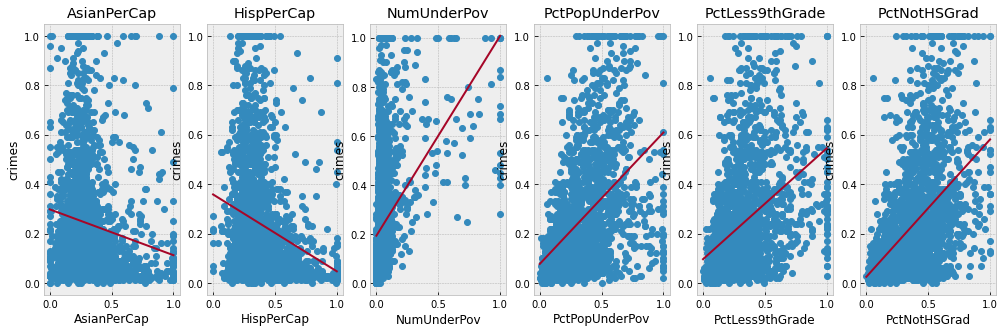

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[24:30]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

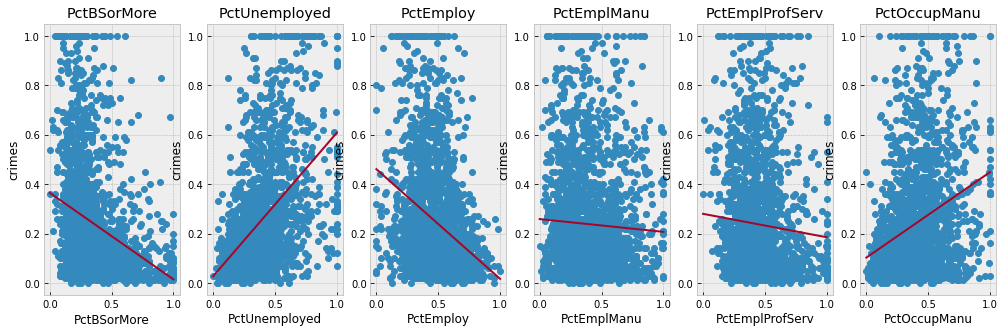

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[30:36]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

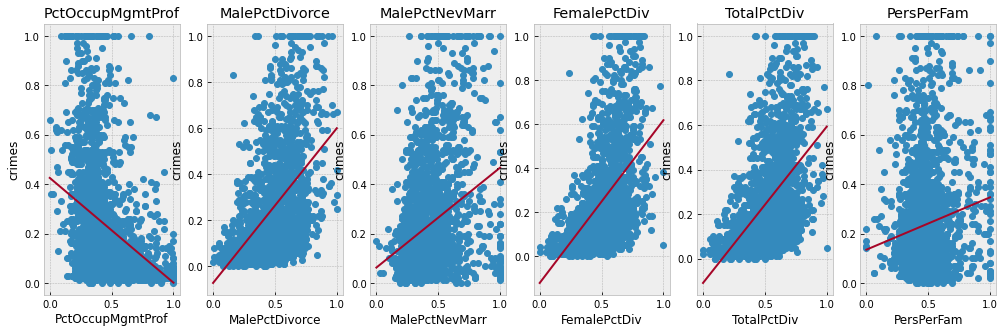

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[36:42]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

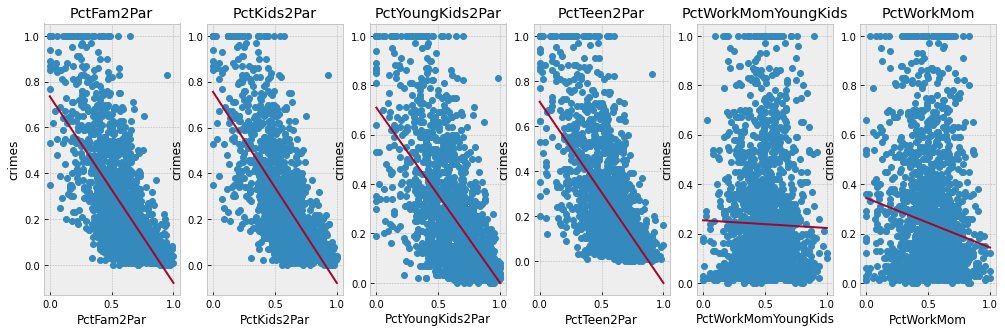

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[42:48]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

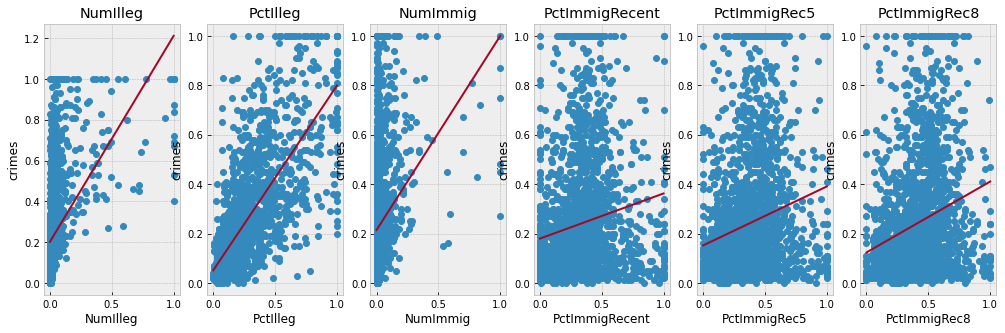

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[48:54]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

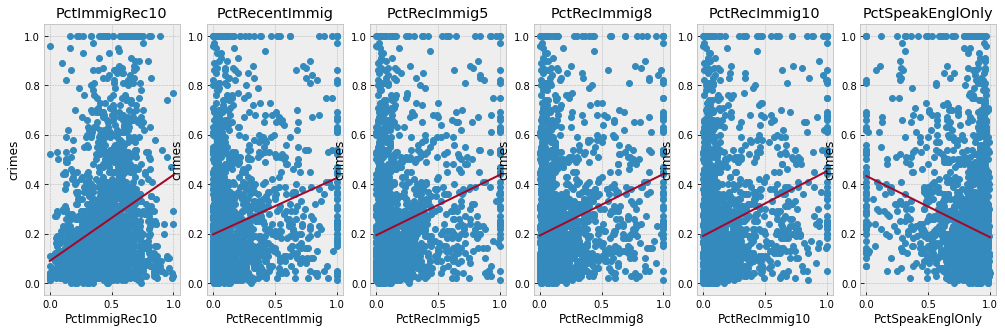

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[54:60]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

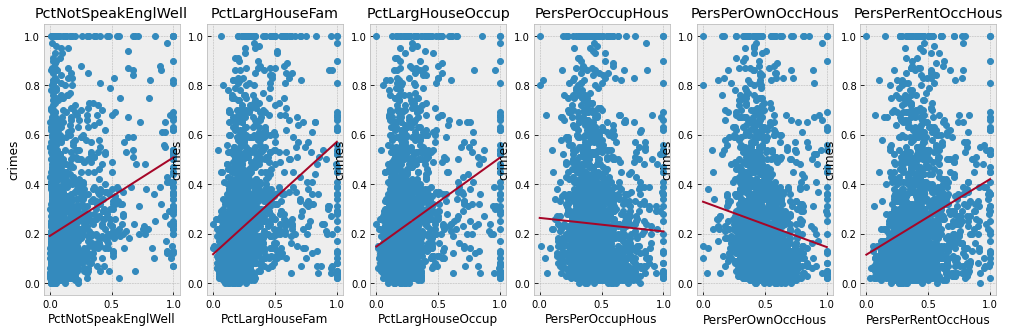

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[60:66]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

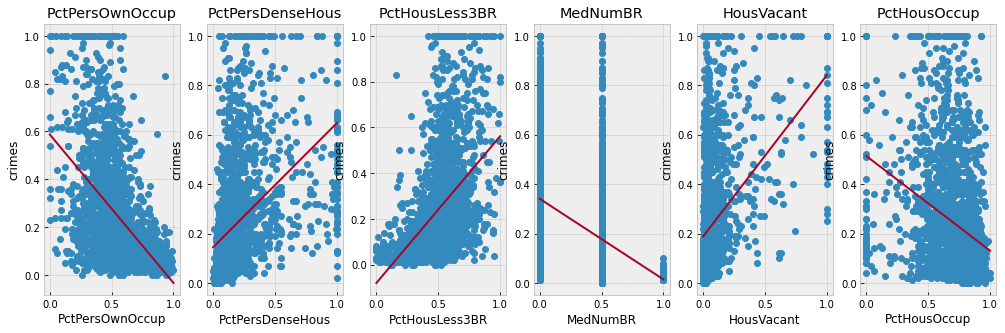

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[66:72]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

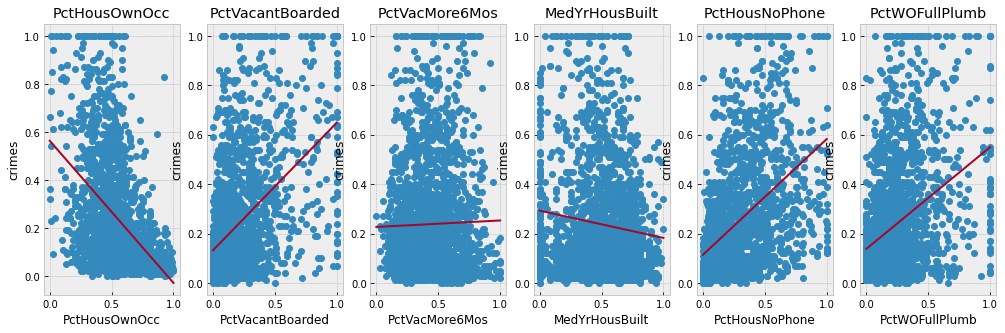

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[72:78]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

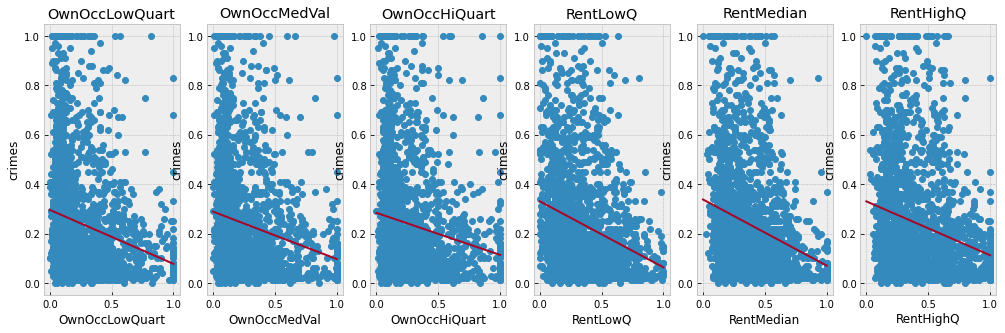

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[78:84]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

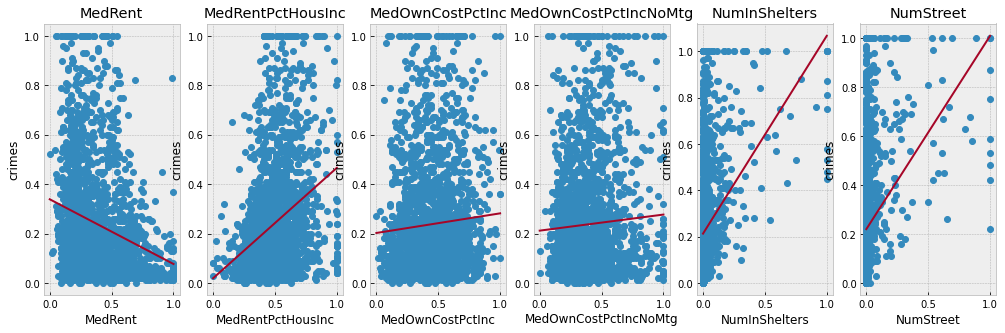

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[84:90]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

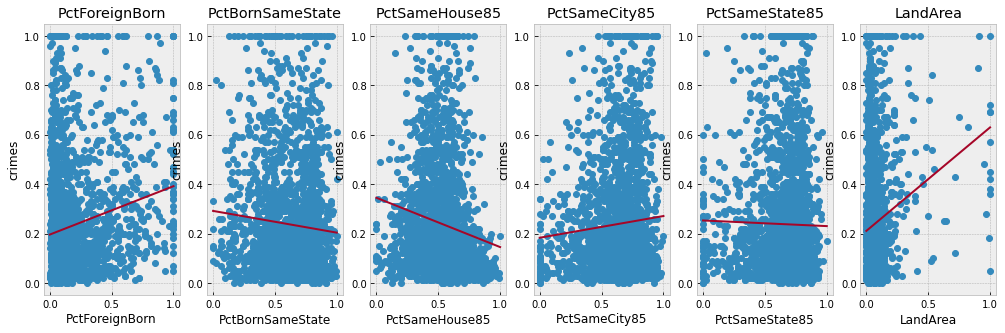

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[90:96]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

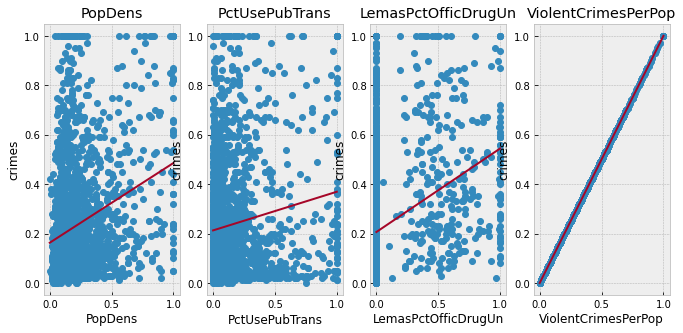

In [0]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[96:]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

The point here is to test 'crimes' in a very lean way. 
We'll do this paying attention to: Histogram - Kurtosis and skewness. 
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


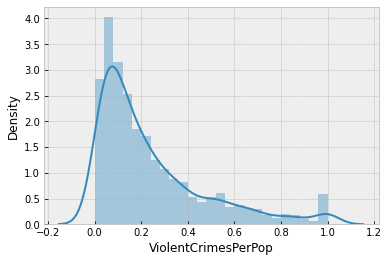

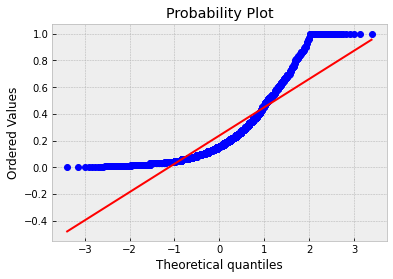

In [0]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(crimes, hist=True);
fig = plt.figure()
res = stats.probplot(crimes, plot=plt)

### Preparing Data for predictions

In [0]:
# split into input (X) and output (Y) variables
X = df.values[:,0:-1]
y = df.values[:,99]

print(X.shape)
print(y.shape)

(1994, 99)
(1994,)


#### Split-out validation dataset

In [0]:
validation_size = 0.20
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric using Root Mean Square error method
#http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

num_folds = 10
#score = 'neg_mean_squared_error'
score = 'r2'

#### Spot Check Algorithms

In [0]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVR', SVR()))
models.append(('RIDGE', Ridge(random_state=seed)))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor(random_state=seed)))
models.append(('GPR', GaussianProcessRegressor(random_state=seed)))

In [0]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.642712 (0.042964)
LASSO: -0.019035 (0.020376)
EN: -0.019035 (0.020376)
KNN: 0.586496 (0.074766)
CART: 0.201906 (0.131115)
SVR: 0.635397 (0.046639)
RIDGE: 0.650887 (0.042516)
RIDGECV: 0.650887 (0.042516)
MLPR: 0.630547 (0.054628)
GPR: 0.516207 (0.053312)


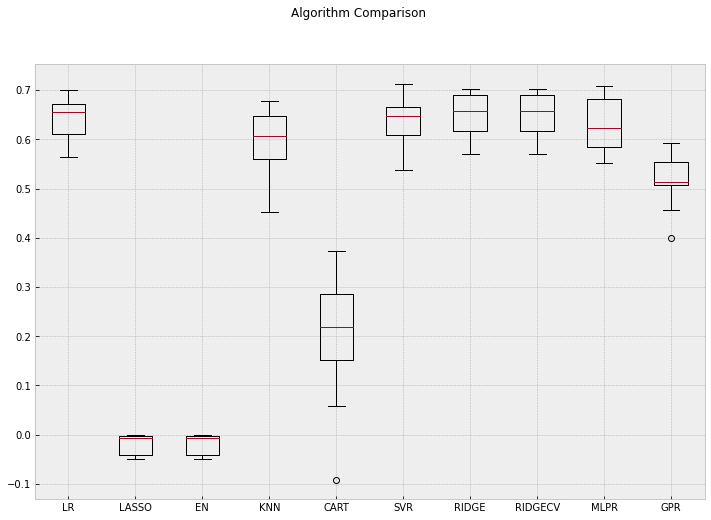

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Standardizing the dataset

In [0]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(random_state=seed))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=seed))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(random_state=seed))])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(random_state=seed))])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledMLPR', Pipeline([('Scaler', StandardScaler()),('MLPR', MLPRegressor(random_state=seed))])))
pipelines.append(('ScaledGPR', Pipeline([('Scaler', StandardScaler()),('GPR', GaussianProcessRegressor(random_state=seed))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.642712 (0.042964)
ScaledLASSO: -0.019035 (0.020376)
ScaledEN: -0.019035 (0.020376)
ScaledKNN: 0.583391 (0.062359)
ScaledCART: 0.212414 (0.139826)
ScaledSVR: 0.603515 (0.050501)
ScaledRIDGE: 0.644881 (0.043186)
ScaledRIDGECV: 0.649173 (0.043589)
ScaledMLPR: 0.204158 (0.152002)
ScaledGPR: -1.088153 (0.111529)


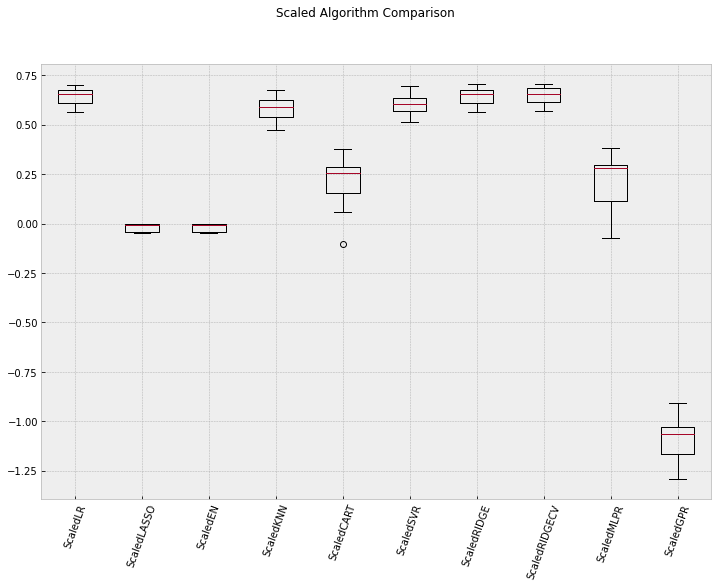

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=70)
plt.show()

### KNN Algorithm tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.597717 using {'n_neighbors': 11}
0.369326 (0.096201) with: {'n_neighbors': 1}
0.572302 (0.062641) with: {'n_neighbors': 3}
0.582215 (0.064473) with: {'n_neighbors': 5}
0.588087 (0.056950) with: {'n_neighbors': 7}
0.594965 (0.050691) with: {'n_neighbors': 9}
0.597717 (0.045667) with: {'n_neighbors': 11}
0.596956 (0.043562) with: {'n_neighbors': 13}
0.596556 (0.040662) with: {'n_neighbors': 15}
0.596031 (0.038631) with: {'n_neighbors': 17}
0.596614 (0.037823) with: {'n_neighbors': 19}
0.594482 (0.034469) with: {'n_neighbors': 21}


### Regression Tree Algorithm tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split_values = [2,3,4]
min_samples_leaf_values = [1,20,40,60,80]

param_grid = dict(min_samples_split=min_samples_split_values, min_samples_leaf=min_samples_leaf_values)
model = DecisionTreeRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.571897 using {'min_samples_leaf': 40, 'min_samples_split': 2}
0.209321 (0.132334) with: {'min_samples_leaf': 1, 'min_samples_split': 2}
0.263912 (0.155390) with: {'min_samples_leaf': 1, 'min_samples_split': 3}
0.274018 (0.137583) with: {'min_samples_leaf': 1, 'min_samples_split': 4}
0.529628 (0.042064) with: {'min_samples_leaf': 20, 'min_samples_split': 2}
0.529628 (0.042064) with: {'min_samples_leaf': 20, 'min_samples_split': 3}
0.529628 (0.042064) with: {'min_samples_leaf': 20, 'min_samples_split': 4}
0.571897 (0.037202) with: {'min_samples_leaf': 40, 'min_samples_split': 2}
0.571897 (0.037202) with: {'min_samples_leaf': 40, 'min_samples_split': 3}
0.571897 (0.037202) with: {'min_samples_leaf': 40, 'min_samples_split': 4}
0.555639 (0.039462) with: {'min_samples_leaf': 60, 'min_samples_split': 2}
0.555639 (0.039462) with: {'min_samples_leaf': 60, 'min_samples_split': 3}
0.555639 (0.039462) with: {'min_samples_leaf': 60, 'min_samples_split': 4}
0.546928 (0.037084) with: {'min_s

#### [Interpreting the Tree](http://blog.datadive.net/interpreting-random-forests/)

A Decision Tree is a tree (and a type of directed, acyclic graph) in which the nodes represent decisions (a square box), random transitions (a circular box) or terminal nodes, and the edges or branches are binary (yes/no, true/false) representing possible paths from one node to another. The specific type of decision tree used for machine learning contains no random transitions. To use a decision tree for classification or regression, one grabs a row of data or a set of features and starts at the root, and then through each subsequent decision node to the terminal node. The process is very intuitive and easy to interpret, which allows trained decision trees to be used for variable selection or more generally, feature engineering.

In [0]:
!pip install treeinterpreter

Looking in indexes: https://artifacts.rbi.tech/artifactory/api/pypi/pypi-org-pypi-proxy/simple/


In [0]:
# https://github.com/andosa/treeinterpreter
from treeinterpreter import treeinterpreter as ti

In [0]:
sample = X_validation[100].reshape(-1, 1)
print(sample.shape)

(99, 1)


In [0]:
dt = DecisionTreeRegressor(random_state=seed,
                           min_samples_leaf=40,
                           min_samples_split=2).fit(rescaledX, Y_train)

prediction, bias, contributions = ti.predict(dt, sample.T)

In [0]:
ft_list = []
for i in range(len(sample.T)):
    #print("Sample", i)
    print("Bias (trainset mean)", bias[i])
    #print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df.columns[:-1]), key=lambda x: -abs(x[0])):
       ft_list.append((feature, round(c, 2)))
    print("-"*50)

Bias (trainset mean) 0.23719749216300925
--------------------------------------------------


In [0]:
labels, values = zip(*ft_list[0:10])

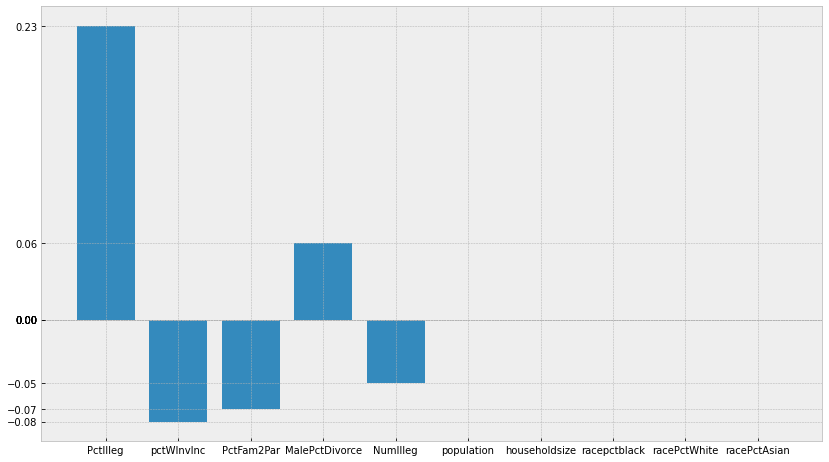

In [0]:
xs = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(14,8))
plt.bar(xs, values, align='center')
plt.xticks(xs, labels)
plt.yticks(values)
plt.show()

The TreeInterpreter library decomposes the predictions as the sum of contributions from each feature  
i.e. prediction = bias + feature(1)contribution + … + feature(n)contribution.

In [0]:
prediction

Out[217]: array([[0.3244186]])

In [0]:
bias

Out[218]: array([0.23719749])

In [0]:
contributions

Out[219]: array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.07895381,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.06320981,  0.        ,  0.        ,
         0.        ,  0.        , -0.07337223,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.05233015,  0.22866749,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.    

In [0]:
print(bias + np.sum(contributions, axis=1))

[0.3244186]


In [0]:
top50x = rescaledX[:50]
top5x = rescaledX[:5]
top50y = Y_train[:50]
top5y = Y_train[:5]

In [0]:
dt = DecisionTreeRegressor(random_state=seed,
                           min_samples_leaf=1,
                           min_samples_split=2).fit(top5x, top5y)

In [0]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()
#export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

### Lasso Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha_values = np.linspace(0.0004,0.002,15)
param_grid = dict(alpha=alpha_values)
model = Lasso(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.649950 using {'alpha': 0.0012000000000000001}
0.649248 (0.043065) with: {'alpha': 0.0004}
0.649390 (0.042746) with: {'alpha': 0.0005142857142857143}
0.649431 (0.042236) with: {'alpha': 0.0006285714285714286}
0.649581 (0.041704) with: {'alpha': 0.000742857142857143}
0.649686 (0.041244) with: {'alpha': 0.0008571428571428572}
0.649785 (0.040834) with: {'alpha': 0.0009714285714285714}
0.649893 (0.040498) with: {'alpha': 0.0010857142857142858}
0.649950 (0.040095) with: {'alpha': 0.0012000000000000001}
0.649941 (0.039622) with: {'alpha': 0.0013142857142857144}
0.649906 (0.039093) with: {'alpha': 0.0014285714285714286}
0.649767 (0.038596) with: {'alpha': 0.001542857142857143}
0.649514 (0.038139) with: {'alpha': 0.0016571428571428572}
0.649190 (0.037763) with: {'alpha': 0.0017714285714285716}
0.648967 (0.037546) with: {'alpha': 0.001885714285714286}
0.648909 (0.037268) with: {'alpha': 0.002}


### Ridge Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha_values = [0, 1, 10, 20, 50, 80, 100, 120, 200, 500]
param_grid = dict(alpha=alpha_values)
model = Ridge(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.650873 using {'alpha': 50}
0.642712 (0.042964) with: {'alpha': 0}
0.644883 (0.043196) with: {'alpha': 1}
0.649173 (0.043618) with: {'alpha': 10}
0.650311 (0.043232) with: {'alpha': 20}
0.650873 (0.042098) with: {'alpha': 50}
0.650626 (0.041224) with: {'alpha': 80}
0.650380 (0.040732) with: {'alpha': 100}
0.650116 (0.040290) with: {'alpha': 120}
0.649030 (0.038862) with: {'alpha': 200}
0.645035 (0.035737) with: {'alpha': 500}


### ElasticNet Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
l1_values = np.linspace(1e-07,1e-05, 15)
param_grid = dict(l1_ratio=l1_values)
model = ElasticNet(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.632979 using {'l1_ratio': 1e-07}
0.632979 (0.031962) with: {'l1_ratio': 1e-07}
0.632979 (0.031962) with: {'l1_ratio': 8.071428571428572e-07}
0.632978 (0.031961) with: {'l1_ratio': 1.5142857142857145e-06}
0.632977 (0.031960) with: {'l1_ratio': 2.2214285714285716e-06}
0.632976 (0.031960) with: {'l1_ratio': 2.9285714285714287e-06}
0.632975 (0.031959) with: {'l1_ratio': 3.6357142857142858e-06}
0.632975 (0.031958) with: {'l1_ratio': 4.342857142857143e-06}
0.632974 (0.031957) with: {'l1_ratio': 5.05e-06}
0.632973 (0.031957) with: {'l1_ratio': 5.7571428571428574e-06}
0.632972 (0.031956) with: {'l1_ratio': 6.464285714285715e-06}
0.632971 (0.031955) with: {'l1_ratio': 7.171428571428572e-06}
0.632971 (0.031954) with: {'l1_ratio': 7.878571428571429e-06}
0.632970 (0.031954) with: {'l1_ratio': 8.585714285714287e-06}
0.632969 (0.031953) with: {'l1_ratio': 9.292857142857144e-06}
0.632968 (0.031952) with: {'l1_ratio': 1e-05}


### MLP Algorithm Tunning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

solver_values = ['lbfgs'] #, 'sgd', 'adam']
alpha_values = np.linspace(1e-5, 1e-4, 10)

param_grid = dict(solver=solver_values, alpha=alpha_values)
model = MLPRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)

#grid_result = grid.fit(rescaledX, Y_train)
grid_result = grid.fit(X_train, Y_train) #Without scaling, that seems not to improve model

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

### GPR Algorithm Tunning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

alpha_values = np.linspace(1e-8, 1e-9, 6)
kernel_values = [1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),
                 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=2, noise_level_bounds=(1e-10, 1e+1))]

param_grid = dict(kernel=kernel_values, alpha=alpha_values)
model = GaussianProcessRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)

#grid_result = grid.fit(rescaledX, Y_train)
grid_result = grid.fit(X_train, Y_train) #Without scaling, that seems not to improve model

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/databricks/python/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/databricks/python/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/databricks/python/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value f

### Plotting the tunned algorithms

In [0]:
pipelines = []
pipelines.append(('Scaled LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Scaled Opt LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(alpha=0.0012, random_state=seed))])))
pipelines.append(('Scaled Opt EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(l1_ratio=1e-07, random_state=seed))])))
pipelines.append(('Scaled Opt KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=11))])))
pipelines.append(('Scaled Opt CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(min_samples_leaf=40,
                                                                                                           min_samples_split=3,
                                                                                                           random_state=seed))])))
pipelines.append(('Scaled SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('Scaled Opt RIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(alpha=80, random_state=seed))])))
pipelines.append(('Scaled RIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('Opt MLPR', Pipeline([('MLPR', MLPRegressor(alpha=5e-05, solver='lbfgs', random_state=seed))])))
pipelines.append(('Opt GPR', Pipeline([('GPR', GaussianProcessRegressor(alpha=1e-8, 
                                                                        kernel=1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
                                                                        + WhiteKernel(noise_level=2, noise_level_bounds=(1e-10, 1e+1)), 
                                                                        random_state=seed))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled LR: 0.642712 (0.042964)
Scaled Opt LASSO: 0.649990 (0.040060)
Scaled Opt EN: 0.633067 (0.032087)
Scaled Opt KNN: 0.596825 (0.045275)
Scaled Opt CART: 0.571839 (0.037138)
Scaled SVR: 0.603515 (0.050501)
Scaled Opt RIDGE: 0.650641 (0.041172)
Scaled RIDGECV: 0.649173 (0.043589)
/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

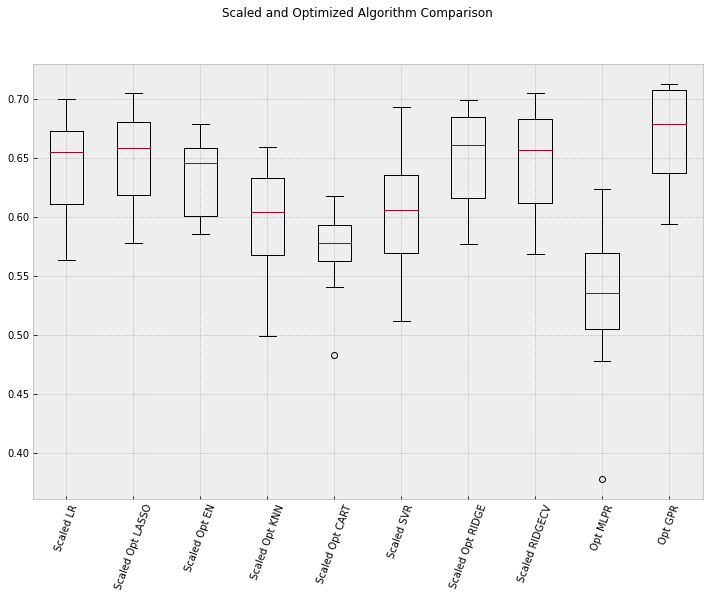

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled and Optimized Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=70)
plt.show()

### Ensembles

In [0]:
ensembles = []
ensembles.append(('Scaled AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor(random_state=seed))])))
ensembles.append(('Scaled GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(random_state=seed))])))
ensembles.append(('Scaled RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=seed))])))
ensembles.append(('Scaled ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(random_state=seed))])))
results_ensembles = []
names_ensembles = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results_ensembles.append(cv_results)
    names_ensembles.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled AB: 0.462853 (0.076592)
Scaled GBM: 0.643466 (0.044733)
Scaled RF: 0.636609 (0.031692)
Scaled ET: 0.652630 (0.040290)


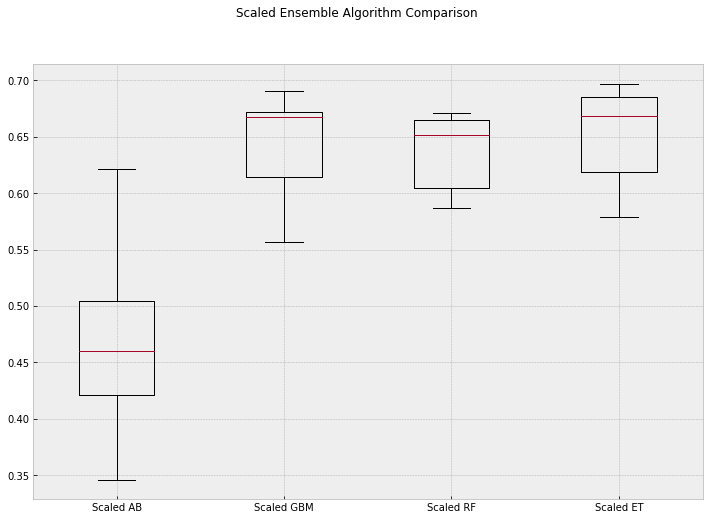

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_ensembles)
ax.set_xticklabels(names_ensembles)
plt.show()

### AdaBoost Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([2,5,10,20,30,40]))
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.580803 using {'n_estimators': 5}
0.511382 (0.068001) with: {'n_estimators': 2}
0.580803 (0.031743) with: {'n_estimators': 5}
0.578415 (0.041980) with: {'n_estimators': 10}
0.547950 (0.052060) with: {'n_estimators': 20}
0.523271 (0.055861) with: {'n_estimators': 30}
0.489232 (0.069062) with: {'n_estimators': 40}


### GBM Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([20,35,40,45,50,55,60,100]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.644738 using {'n_estimators': 60}
0.618569 (0.030485) with: {'n_estimators': 20}
0.641084 (0.037055) with: {'n_estimators': 35}
0.643038 (0.038755) with: {'n_estimators': 40}
0.643493 (0.040910) with: {'n_estimators': 45}
0.644170 (0.041702) with: {'n_estimators': 50}
0.644118 (0.042414) with: {'n_estimators': 55}
0.644738 (0.040827) with: {'n_estimators': 60}
0.643243 (0.045391) with: {'n_estimators': 100}


### Random Forest Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators_values=np.array([30,50,70])
min_samples_split_values = [2,3]
min_samples_leaf_values = [10,20,30]

param_grid = dict(n_estimators=n_estimators_values,
                  min_samples_split=min_samples_split_values, 
                  min_samples_leaf=min_samples_leaf_values)

model = RandomForestRegressor(random_state=seed, n_jobs=-1)
kfold = KFold(n_splits=num_folds)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.645584 using {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 10}
0.645432 (0.028481) with: {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 10}
0.637022 (0.025379) with: {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 20}
0.635279 (0.021689) with: {'n_estimators': 30, 'min_samples_split': 3, 'min_samples_leaf': 20}
0.637022 (0.025379) with: {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 20}
0.630129 (0.021993) with: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 30}
0.636541 (0.024536) with: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 20}
0.630323 (0.022352) with: {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 30}
0.630129 (0.021993) with: {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 30}
0.645432 (0.028481) with: {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 10}
0.645584 (0.027875) with: {'n_estimators': 50, 'min_sam

In [0]:
rf = RandomForestRegressor(random_state=seed, 
                           n_jobs=-1,
                           n_estimators=50,
                           min_samples_leaf=1,
                           min_samples_split=2).fit(rescaledX, Y_train)

prediction, bias, contributions = ti.predict(rf, sample.T)

In [0]:
ft_list = []
for i in range(len(sample.T)):
    #print("Sample", i)
    print("Bias (trainset mean)", bias[i])
    #print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df.columns[:-1]), key=lambda x: -abs(x[0])):
       ft_list.append((feature, round(c, 2)))
    print("-"*50)

Bias (trainset mean) 0.2368070219435737
--------------------------------------------------


In [0]:
labels, values = zip(*ft_list[0:15])

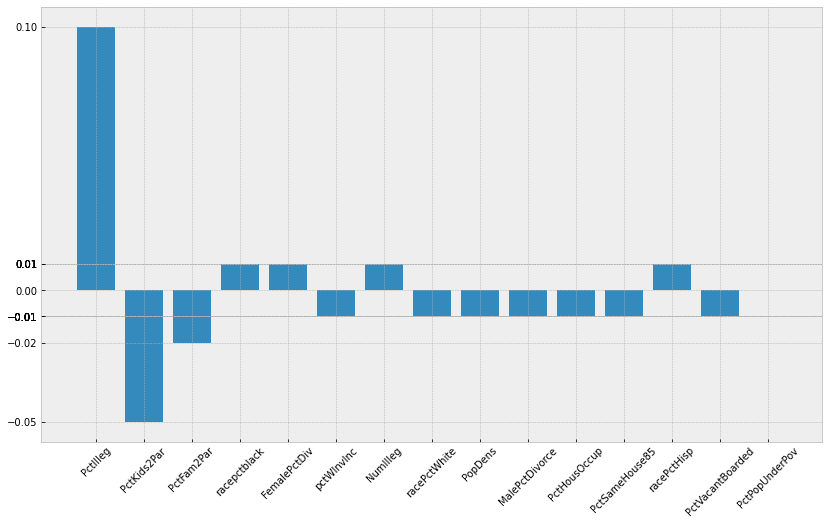

In [0]:
xs = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(14,8))
plt.bar(xs, values, align='center')
plt.xticks(xs, labels, rotation=45)
plt.yticks(values)
plt.show()

In [0]:
prediction

Out[242]: array([[0.2666]])

In [0]:
bias

Out[243]: array([0.23680702])

In [0]:
contributions

Out[244]: array([[ 4.50000000e-04, -7.33333333e-05,  1.03752620e-02,
        -7.75723008e-03,  2.85714286e-05,  5.44782840e-03,
         2.47619048e-04,  7.34901961e-04,  2.55752245e-03,
         2.31855011e-03, -2.80276080e-04, -1.19378531e-03,
        -8.00000000e-05, -8.39722222e-04, -2.35087940e-04,
        -7.86907549e-03,  2.00000000e-04,  3.74762475e-03,
         2.74708478e-03, -2.07651573e-03, -3.66161616e-03,
        -7.90867089e-04, -1.08812731e-03,  8.75006159e-04,
        -1.85612958e-03, -4.80438159e-03, -3.16098369e-03,
         4.98080292e-03, -6.13598834e-04, -3.22100840e-04,
         3.62777778e-04, -2.35445666e-04,  1.38966192e-04,
        -9.09465917e-05,  9.18667094e-04, -1.43099406e-04,
        -1.09605709e-03, -5.80409555e-03, -7.87606838e-04,
         8.24436277e-03,  1.66337415e-03,  3.79116405e-03,
        -1.71694796e-02, -5.28929324e-02, -1.50240954e-04,
         8.70216450e-04, -1.60352254e-03, -1.85857344e-03,
         7.85397798e-03,  1.02086453e-01, -4.0

In [0]:
print(bias + np.sum(contributions, axis=1))

[0.2666]


In [0]:
rf = RandomForestRegressor(random_state=seed, 
                           n_jobs=-1,
                           n_estimators=50,
                           min_samples_leaf=1,
                           min_samples_split=2).fit(top50x, top50y)

In [0]:
estimator = rf.estimators_[5]
estimator1 = rf.estimators_[6]

In [0]:
#dot_data = StringIO()
#export_graphviz(estimator, out_file=dot_data, filled=True, rounded=True, special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

### Extra Tree Algorithm Tuning

In [0]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators_values=np.array([200,300])
min_samples_split_values = [2,3]
min_samples_leaf_values = [1,10,20]

param_grid = dict(n_estimators=n_estimators_values,
                  min_samples_split=min_samples_split_values, 
                  min_samples_leaf=min_samples_leaf_values)

model = ExtraTreesRegressor(random_state=seed, n_jobs=-1)
kfold = KFold(n_splits=num_folds)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.654278 using {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1}
0.654218 (0.040400) with: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1}
0.637504 (0.031720) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 20}
0.654278 (0.042945) with: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1}
0.638490 (0.031593) with: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 20}
0.648768 (0.035782) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 10}
0.652180 (0.040115) with: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1}
0.637504 (0.031720) with: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 20}
0.653887 (0.041618) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1}
0.650043 (0.035834) with: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 10}
0.650043 (0.035834) with: {'n_estimators': 300, 'm

### Optimized Ensembles

In [0]:
ensembles = []
ensembles.append(('Scaled Opt AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor(n_estimators=5))])))
ensembles.append(('Scaled Opt GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(n_estimators=60))])))
ensembles.append(('Scaled Opt RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=70, 
                                                                                                        min_samples_split=3,
                                                                                                        min_samples_leaf=10))])))
ensembles.append(('Scaled Opt ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=300, 
                                                                                                      min_samples_split=3,
                                                                                                      min_samples_leaf=1))])))
results_ensembles = []
names_ensembles = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results_ensembles.append(cv_results)
    names_ensembles.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled Opt AB: 0.559505 (0.041886)
Scaled Opt GBM: 0.643716 (0.042244)
Scaled Opt RF: 0.637738 (0.030913)
Scaled Opt ET: 0.654655 (0.041794)


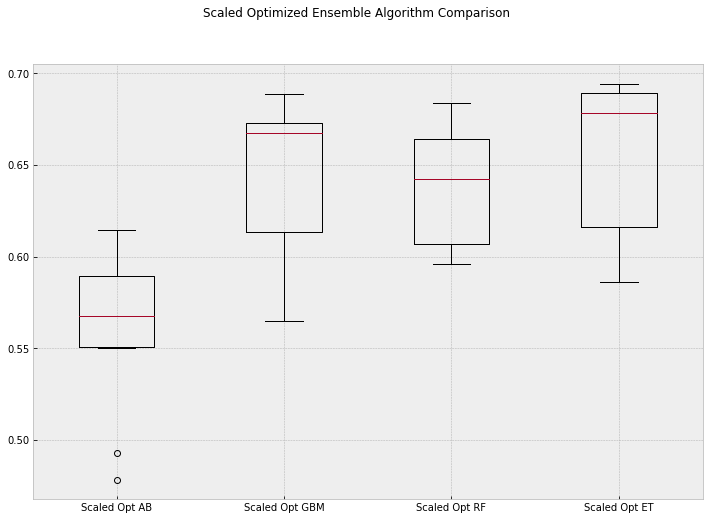

In [0]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Optimized Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_ensembles)
ax.set_xticklabels(names_ensembles)
plt.show()

### Summarizing all the optimized results

In [0]:
results_all = results + results_ensembles
names_all = names + names_ensembles

pd.Series([x.mean() for x in results_all], index=names_all).sort_values(ascending=False)

Out[252]: Opt GPR             0.67
Scaled Opt ET       0.65
Scaled Opt RIDGE    0.65
Scaled Opt LASSO    0.65
Scaled RIDGECV      0.65
Scaled Opt GBM      0.64
Scaled LR           0.64
Scaled Opt RF       0.64
Scaled Opt EN       0.63
Scaled SVR          0.60
Scaled Opt KNN      0.60
Scaled Opt CART     0.57
Scaled Opt AB       0.56
Opt MLPR            0.53
dtype: float64

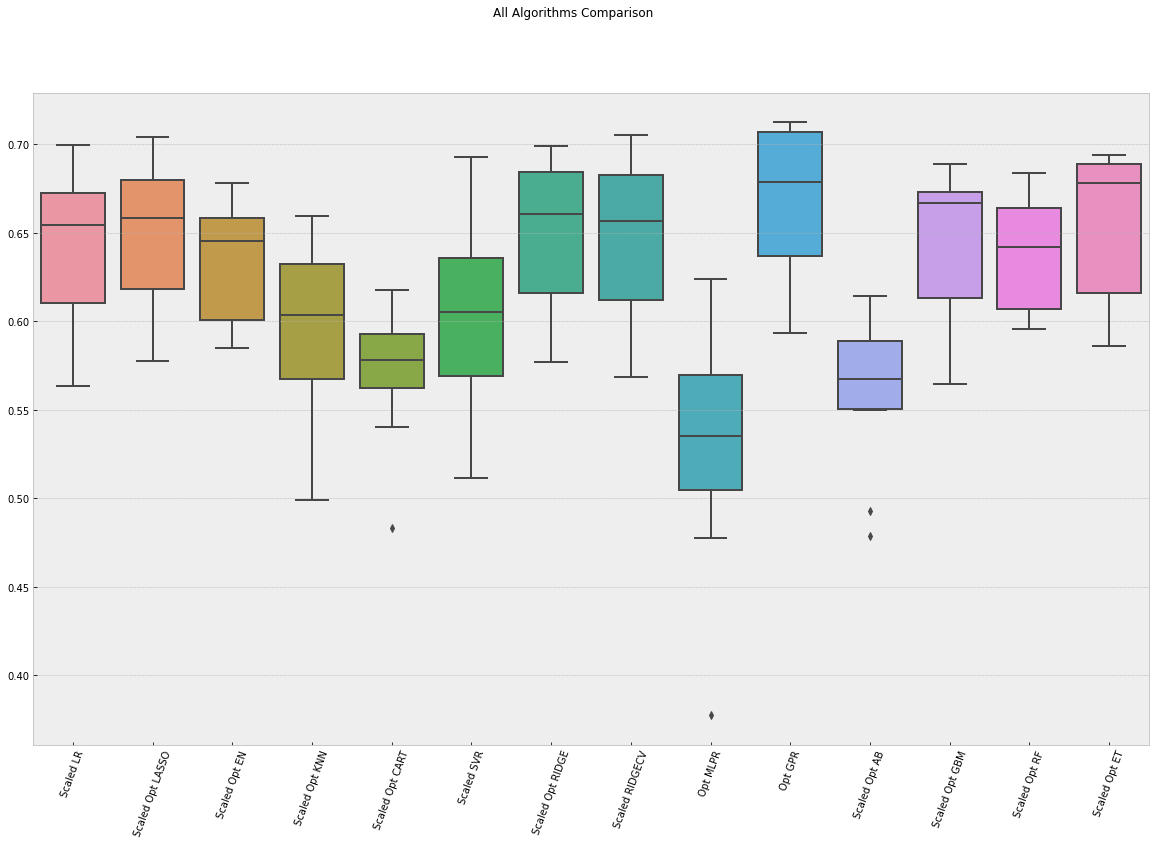

In [0]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('All Algorithms Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results, widths=0.5)
sns.boxplot(data=results_all)
ax.set_xticklabels(names_all)
plt.xticks(rotation=70)
plt.show()

#### So our best regressors are Gaussian Processes, Extra Trees, Ridge and Lasso

#### Let's examine how Lasso / Ridge / ElasticNet Regularization  
i.e. elimination of irrelevant features setting their coeficients to Zero or close:

In [0]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Lasso(alpha=0.00145, random_state=seed)
model.fit(rescaledX, Y_train)

Out[254]: Lasso(alpha=0.00145, random_state=0)

In [0]:
eval = pd.Series(model.coef_, index=df.columns[:-1]).sort_values()
eval

Out[255]: PctKids2Par             -0.05
PctPopUnderPov          -0.02
MedOwnCostPctIncNoMtg   -0.02
pctWInvInc              -0.02
PctWorkMom              -0.01
                         ... 
NumStreet                0.02
PctPersDenseHous         0.02
HousVacant               0.02
PctIlleg                 0.04
racepctblack             0.04
Length: 99, dtype: float64

Out[256]: <AxesSubplot:title={'center':'Modal Coefficients'}>

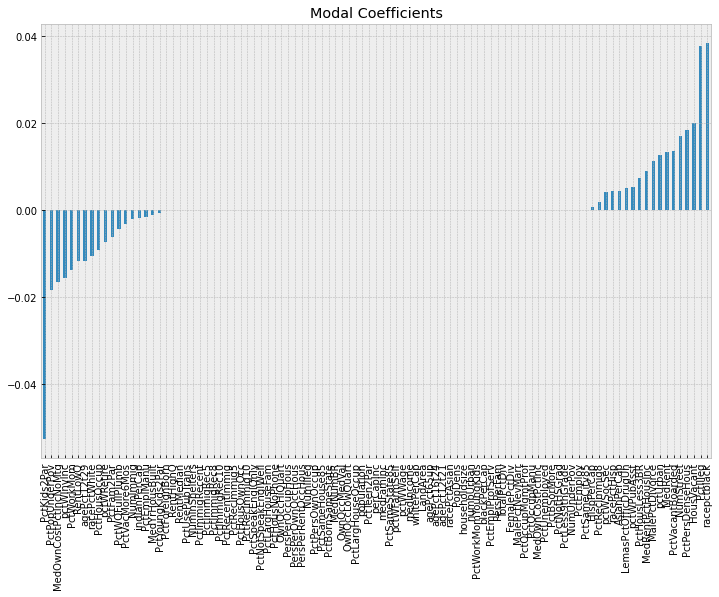

In [0]:
eval.plot(kind='bar', title='Modal Coefficients', figsize=(12,8))

Out[257]: <AxesSubplot:title={'center':'Modal Coefficients'}>

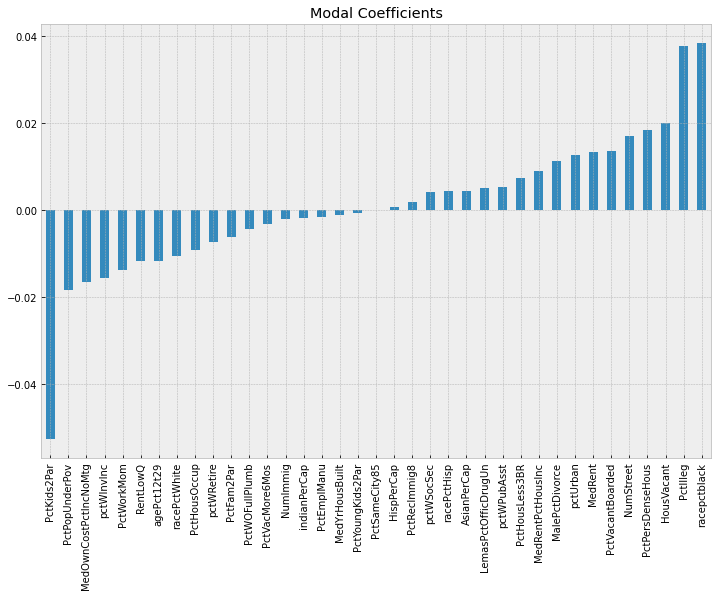

In [0]:
eval2 = eval[np.abs(eval)>1e-6]
eval2.plot(kind='bar', title='Modal Coefficients', figsize=(12,8))

#### Verifying the Lasso and ElasticNet paths

(see pages pages 69-73 from [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

In [0]:
eps = 5e-3

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(rescaledX, Y_train, eps, random_state=0)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(rescaledX, Y_train, eps, positive=True, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(rescaledX, Y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(rescaledX, Y_train, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...
/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass eps=0.005 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass eps=0.005 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Out[259]: (0.5534468742250748,
 3.191180883764316,
 -0.07802807201341341,
 0.04993950599691279)

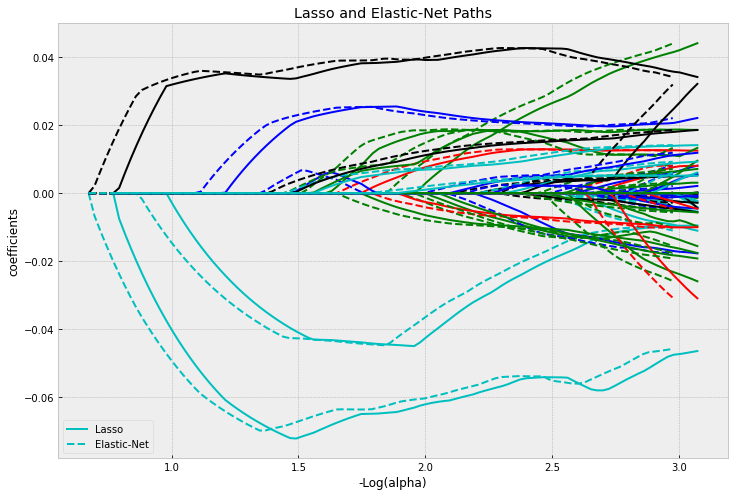

In [0]:
# Display results
plt.figure(figsize=(12,8))
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

Out[260]: (0.655202387883534,
 3.186335383113913,
 -0.08107456050479443,
 0.11391576431591433)

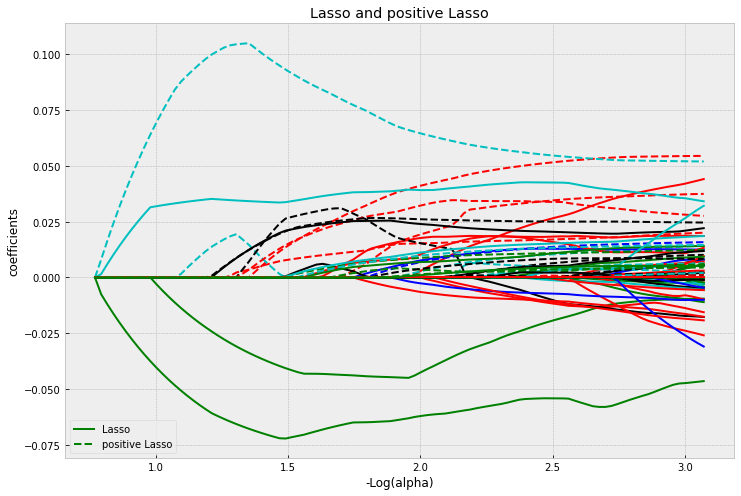

In [0]:
plt.figure(figsize=(12,8))
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')

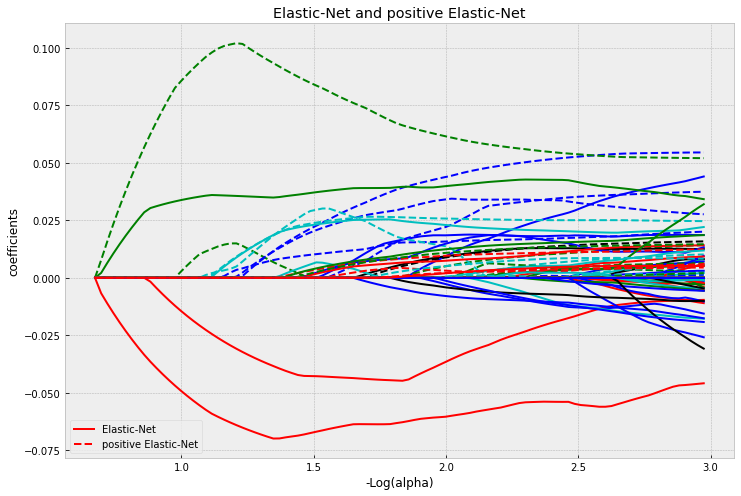

In [0]:
plt.figure(figsize=(12,8))
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

In [0]:
# transform the validation dataset
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Lasso(alpha=0.00145, random_state=0)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.02094980229518499


### Keras Regression

Implementing \\( R^2 \\) metric

In [0]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [0]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[coeff_determination])
model.summary()

# Fit the model
early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)
history =  model.fit(X_train, 
                     Y_train, 
                     epochs=150, 
                     batch_size=50, 
                     verbose=0, 
                     validation_data=(X_validation, Y_validation),) 
#                     callbacks=[early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,314
Trainable params: 1,314
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist_df = pd.DataFrame(history.history)
hist_df.tail()

loss 
 coeff_determination 
 val_loss 
 val_coeff_determination 
 
 
 
 
 145 
 0.02 
 0.65 
 0.02 
 0.63 
 
 
 146 
 0.02 
 0.65 
 0.02 
 0.63 
 
 
 147 
 0.02 
 0.65 
 0.02 
 0.63 
 
 
 148 
 0.02 
 0.65 
 0.02 
 0.63 
 
 
 149 
 0.02 
 0.63 
 0.02 
 0.63

In [0]:
scores = model.evaluate(X_validation, Y_validation, verbose=1)
print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))

13/13 [==============================] - 0s 1ms/step - loss: 0.0209 - coeff_determination: 0.6256
loss: 0.0209%
coeff_determination: 0.6256%


Out[267]: <matplotlib.legend.Legend at 0x7f1d581c0130>

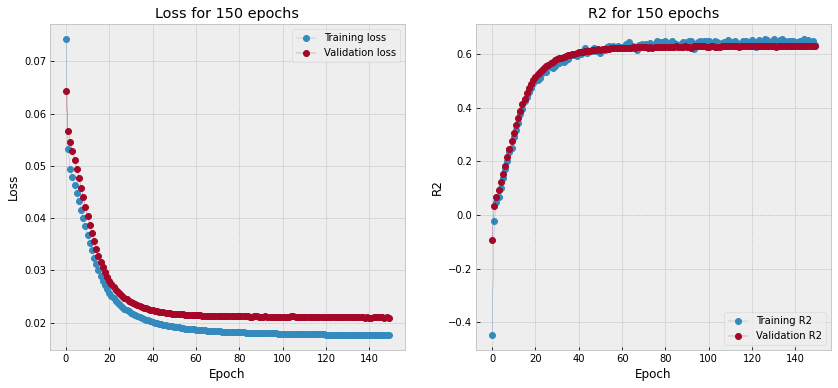

In [0]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.coeff_determination, label='Training R2', **params_dict)
plt.plot(hist_df.val_coeff_determination, label='Validation R2', **params_dict)
plt.title('R2 for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()

In [0]:
# Making predictions
y_pred = model.predict(X_validation)
y_pred[0:10]

13/13 [==============================] - 0s 906us/step
Out[268]: array([[0.07279926],
       [0.08930498],
       [0.21712169],
       [0.05598929],
       [0.16244122],
       [0.22590491],
       [0.38401744],
       [0.19971627],
       [0.3100384 ],
       [0.08309628]], dtype=float32)

In [0]:
# Using k-fold cross validation
i=1
cvscores0 = []
cvscores1 = []
kfold = KFold(n_splits=10)
for train, validation in kfold.split(X, y):
    # Create model
    model = Sequential()
    model.add(Dense(13, input_dim=X[train].shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[coeff_determination])
    # Fit the model
    model.fit(X[train], 
              y[train], 
              epochs=150, 
              batch_size=20, 
              verbose=0, 
              validation_data=(X[validation], y[validation]),) 
              #callbacks=[early_stopping])
    # evaluate the model
    print('\nResults from #{} run...'.format(i))
    scores = model.evaluate(X[validation], y[validation], verbose=1)
    print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))
    cvscores0.append(scores[0])
    cvscores1.append(scores[1])
    i+=1
model.summary()
print("%.2f%% (+/- %.4f%%)" % (np.mean(cvscores0), np.std(cvscores0)))
print("%.2f%% (+/- %.4f%%)" % (np.mean(cvscores1), np.std(cvscores1)))


Results from #1 run...
7/7 [==============================] - 0s 1ms/step - loss: 0.0218 - coeff_determination: 0.5909
loss: 0.0218%
coeff_determination: 0.5909%

Results from #2 run...
7/7 [==============================] - 0s 1ms/step - loss: 0.0185 - coeff_determination: 0.5982
loss: 0.0185%
coeff_determination: 0.5982%

Results from #3 run...
7/7 [==============================] - 0s 1ms/step - loss: 0.0259 - coeff_determination: 0.0441
loss: 0.0259%
coeff_determination: 0.0441%

Results from #4 run...
7/7 [==============================] - 0s 1ms/step - loss: 0.0202 - coeff_determination: 0.4912
loss: 0.0202%
coeff_determination: 0.4912%

Results from #5 run...
7/7 [==============================] - 0s 1ms/step - loss: 0.0174 - coeff_determination: 0.7042
loss: 0.0174%
coeff_determination: 0.7042%

Results from #6 run...
7/7 [==============================] - 0s 1ms/step - loss: 0.0153 - coeff_determination: 0.7023
loss: 0.0153%
coeff_determination: 0.7023%

Results from #7 run..